In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
color_palette = 'gray' # deep, gray
sns.set(context='notebook', style='darkgrid', palette=color_palette, 
        font='sans-serif', font_scale=1.5, color_codes=False, rc=None)
markers = ['.', "x", "s", "+", "v", "p", "^", "<", ">", "1", "2", "3", "4"]
n_markers = len(markers)
color_list = sns.color_palette()
linestyles = ['-', '--', '-.', ':']

# データの取得

In [3]:
data = pd.read_csv('data/choco_data.csv')
tastes = pd.read_csv('data/choco_tastes.csv')
data = data.merge(tastes, left_on=['taste'], right_on=['id'])
data.head()

,measure_date,best_before,taste,buyer,silver,id,name,name_en,spec
0,2017-12-10,2018-09-01,1,A,0,1,いちご,strawberry,25
1,2017-12-10,2018-09-01,1,A,0,1,いちご,strawberry,25
2,2017-12-10,2018-09-01,1,A,0,1,いちご,strawberry,25
3,2017-12-10,2018-09-01,1,A,0,1,いちご,strawberry,25
4,2017-12-10,2018-09-01,1,A,0,1,いちご,strawberry,25


In [4]:
total_counts = data.shape[0]
angel_counts = data.silver.sum()

print('total_count : {}'.format(total_counts))
print('angel_count : {}'.format(angel_counts))


total_count : 534
angel_count : 26


# 推定量の算出

## 最尤推定量

In [5]:
theta_mle = angel_counts/total_counts
print('MLE : ', theta_mle)

MLE :  0.04868913857677903


## 事後分布の導出

In [6]:
# 事前分布
a = 1
b = 1

# 事後分布
a_hat = a + angel_counts
b_hat = b + (total_counts - angel_counts)
x = np.linspace(0, 1.0, 1000) # x軸の設定
pdf = stats.beta(a_hat, b_hat).pdf(x)
## 代表点
map_val = x[pdf.argmax()]
e_val = a_hat / (a_hat + b_hat)

print('MAP : ', map_val)
print('mean : ', e_val)

MAP :  0.04904904904904905
mean :  0.05037313432835821


## 可視化

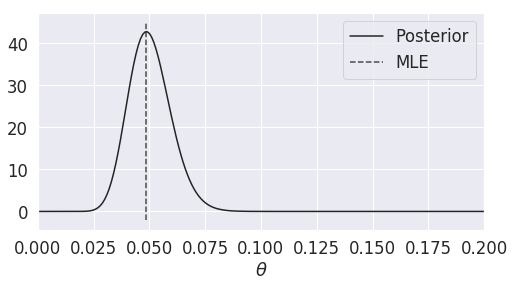

In [7]:
fig = plt.figure(figsize=(8, 4))
ax = fig.subplots(1,1)

ax.plot(x, pdf, c=color_list[0], label='Posterior')
ax.set_xlim(0, 0.2)
ax.set_xlabel('$\\theta$')

xmin, xmax, ymin, ymax = ax.axis()
ax.vlines(theta_mle, ymin, ymax, 
          linestyle=linestyles[1], 
          colors=color_list[1], 
          label='MLE')

ax.legend()

plt.savefig('appendix_angel_rate.png')